In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
def age_group(age: int):
    if age == 18:
        return "18"
    elif 18 < age <= 24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
    return None

In [5]:
sns.set(style="whitegrid")
df = pd.read_csv("dataset/nyt/nyt1.csv")
df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]
data_filter_noNullAge = df[df.age > 0].copy()
data_filter_noNullAge["age_group"] = [age_group(age) for age in data_filter_noNullAge.age.to_list()]

,age_group,gender,age,impressions,clicks,signed_in
0,18,0,45576,12683,205,2532
1,18,1,52056,14318,253,2892
2,18-24,0,349689,82374,797,16441
3,18-24,1,400470,94210,912,18829
4,25-34,0,802877,136292,1388,27216
5,25-34,1,913451,154219,1549,30958
6,35-44,0,1310798,166324,1707,33184
7,35-44,1,1487795,189500,1955,37676
8,45-54,0,1498737,151650,1542,30281
9,45-54,1,1683042,170459,1690,34007


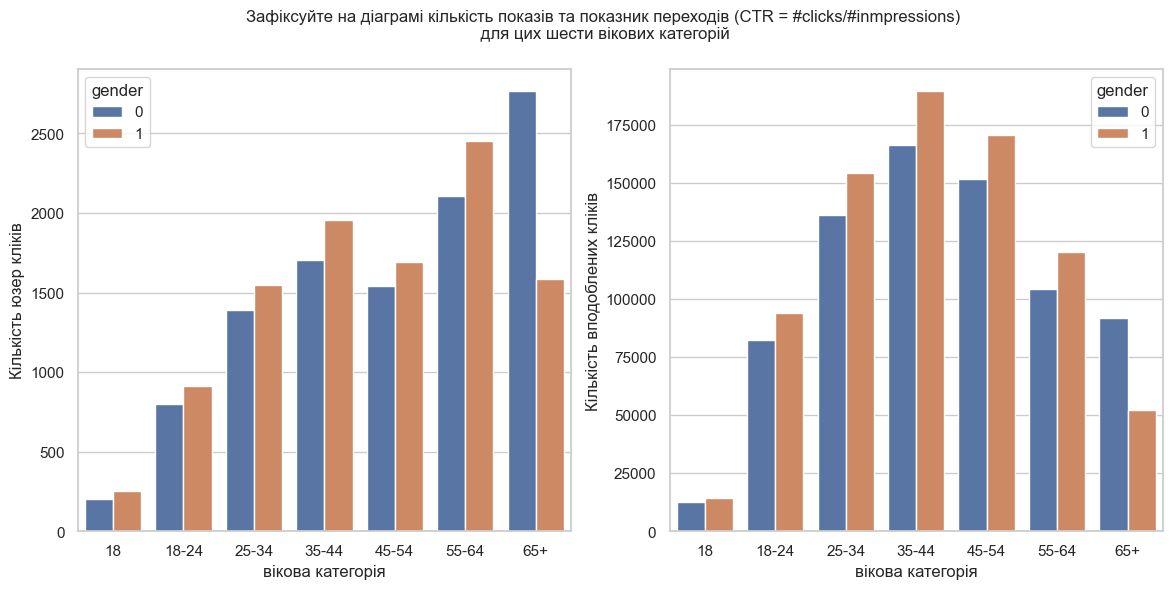

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("Зафіксуйте на діаграмі кількість показів та показник переходів (CTR = #clicks/#inmpressions)\n для цих шести вікових категорій", fontsize=12)
group_data = data_filter_noNullAge.groupby(["age_group", "gender"],as_index=False).sum()
sns.barplot(data = group_data, 
            x = "age_group", 
            y = "clicks",
            hue="gender",
            ax=axes[0])
sns.barplot(data = group_data, 
            x = "age_group", 
            y = "impressions",
            hue="gender",
            ax=axes[1])
axes[0].set(xlabel='вікова категорія',ylabel='Кількість юзер кліків')
axes[1].set(xlabel='вікова категорія',ylabel='Кількість вподоблених кліків')
group_data.sort_values(['age_group'])

,signed_in,age
0,0,137106
1,1,321335


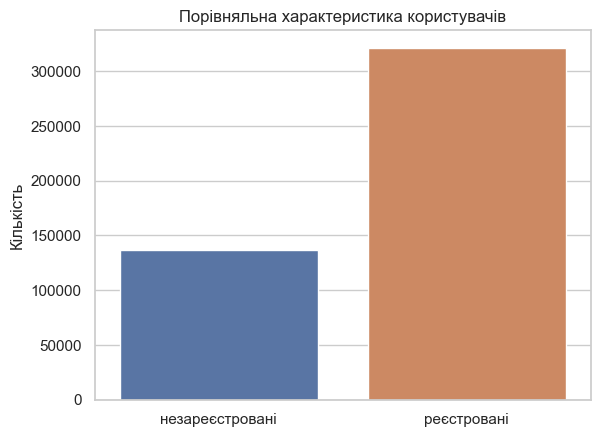

In [48]:
df__ = pd.read_csv("dataset/nyt/nyt1.csv")
df__.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df__.columns]
date = df__[["signed_in", "age"]].groupby("signed_in", as_index=False).count()
ax = sns.barplot(x = ["незареєстровані","реєстровані"], y = date.age.to_list())
ax.set(title="Порівняльна характеристика користувачів", ylabel="Кількість")
display(date)

In [49]:
#Створіть метрики/вимірювання/статистику, які підсумовують дані. 
#Приклади можливих метрик включають CTR, квантил, середнє значення, медіану, дисперсію та максимальне значення. 
#Ці показники потрібно розрахувати за різними сегментами користувачів. 
#Подумайте про елементи, які важливо відстежувати з часом - що стискає дані, але, як і раніше, захоплює поведінку користувача.

display(data_filter_noNullAge.groupby("age_group").impressions.mean())
display(data_filter_noNullAge.groupby("age_group").impressions.median())
display(data_filter_noNullAge.groupby("age_group").impressions.max())
display([print("{} - {}".format(value, data_filter_noNullAge[value].std())) for value in ["clicks","impressions", "age"]])

age_group
18       4.978060
18-24    5.006635
25-34    4.993829
35-44    5.021507
45-54    5.010406
55-64    5.022308
65+      5.012347
Name: impressions, dtype: float64

age_group
18       5.0
18-24    5.0
25-34    5.0
35-44    5.0
45-54    5.0
55-64    5.0
65+      5.0
Name: impressions, dtype: float64

age_group
18       17
18-24    17
25-34    17
35-44    20
45-54    17
55-64    16
65+      16
Name: impressions, dtype: int64

clicks - 0.26865924370778604
impressions - 2.2387837047376538
age - 16.308116568751352


[None, None, None]

In [50]:
# Результати статистичного дослідження подати у вигляді результуючого ДатаФрейма (одного), дивлячись на який можна зрозуміти і порівнювати дані за віковими підкатегоріями.

def query(search: str, age_category: str, gender = 2):
    result = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
    days = ["Вівторок", "Середа", "Четверг", "П'ятниця", "Субота", "Неділя", "Понеділок"]
    for i in range(0, 31):
        path = str("dataset/nyt/nyt" + str(i + 1) + ".csv")
        print("Read ->", path)
        df = pd.read_csv(path)
        df.columns = [column.lower().replace("-", "_").replace(" ", "_") for column in df.columns]
        data_no_null_age = df[df.age > 0].copy()
        data_no_null_age["age_group"] = [age_group(age) for age in data_no_null_age.age.to_list()]
        result[i % 7] += \
            data_no_null_age[(data_no_null_age.gender == gender) & (data_no_null_age.age_group == age_category)][
                search].sum() if gender != 2 else data_no_null_age[data_no_null_age.age_group == age_category][
                search].sum()
        
    print("\nResult:")
    for key, value in result.items():
        print("{0} -> {1}".format(days[key % 7], value))
        
    df_result = pd.DataFrame({'days': days, 'value': result.values()})
    ax = sns.barplot(data = df_result, 
            x = "days", 
            y = "value")
    select_gender = "не вказан" if gender == 2 else "жіночий" if gender == 0 else "чоловічий" 
    ax.set(title="Вікова категорія за: {}, кількісна характеристика: {}, гендер: {}".format(age_category, search, select_gender), xlabel=None, ylabel="кількість")

Read -> dataset/nyt/nyt1.csv
Read -> dataset/nyt/nyt2.csv
Read -> dataset/nyt/nyt3.csv
Read -> dataset/nyt/nyt4.csv
Read -> dataset/nyt/nyt5.csv
Read -> dataset/nyt/nyt6.csv
Read -> dataset/nyt/nyt7.csv
Read -> dataset/nyt/nyt8.csv
Read -> dataset/nyt/nyt9.csv
Read -> dataset/nyt/nyt10.csv
Read -> dataset/nyt/nyt11.csv
Read -> dataset/nyt/nyt12.csv
Read -> dataset/nyt/nyt13.csv
Read -> dataset/nyt/nyt14.csv
Read -> dataset/nyt/nyt15.csv
Read -> dataset/nyt/nyt16.csv
Read -> dataset/nyt/nyt17.csv
Read -> dataset/nyt/nyt18.csv
Read -> dataset/nyt/nyt19.csv
Read -> dataset/nyt/nyt20.csv
Read -> dataset/nyt/nyt21.csv
Read -> dataset/nyt/nyt22.csv
Read -> dataset/nyt/nyt23.csv
Read -> dataset/nyt/nyt24.csv
Read -> dataset/nyt/nyt25.csv
Read -> dataset/nyt/nyt26.csv
Read -> dataset/nyt/nyt27.csv
Read -> dataset/nyt/nyt28.csv
Read -> dataset/nyt/nyt29.csv
Read -> dataset/nyt/nyt30.csv
Read -> dataset/nyt/nyt31.csv

Result:
Вівторок -> 12128
Середа -> 11956
Четверг -> 12657
П'ятниця -> 9818
Су

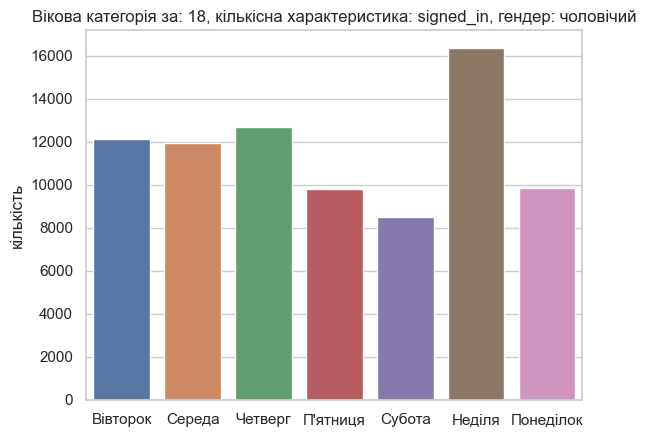

In [51]:
query("signed_in", "18", 1)